In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [29]:
# Read the CSV file into a DataFrame
AQI_18_df = pd.read_csv("../Downloads/daily_aqi_by_county_2018.csv")
AQI_19_df = pd.read_csv("../Downloads/daily_aqi_by_county_2019.csv")
AQI_20_df = pd.read_csv("../Downloads/daily_aqi_by_county_2020.csv")
AQI_21_df = pd.read_csv("../Downloads/daily_aqi_by_county_2021.csv")
AQI_22_df = pd.read_csv("../Downloads/daily_aqi_by_county_2022.csv")
AQI_23_df = pd.read_csv("../Downloads/daily_aqi_by_county_2023.csv")

In [86]:
#Groupby State
nj_2018_df = AQI_18_df.loc[AQI_18_df['State Name'] == 'New Jersey']
#nj_2018_df
nj_2018_df = AQI_19_df.loc[AQI_19_df['State Name'] == 'New Jersey']
#nj_2019_df
nj_2020_df = AQI_20_df.loc[AQI_20_df['State Name'] == 'New Jersey']
#nj_2020_df
nj_2021_df = AQI_21_df.loc[AQI_21_df['State Name'] == 'New Jersey']
#nj_2021_df
nj_2022_df = AQI_22_df.loc[AQI_22_df['State Name'] == 'New Jersey']
#nj_2022_df
nj_2023_df = AQI_23_df.loc[AQI_23_df['State Name'] == 'New Jersey']

In [87]:
# Concatenate the data frames for years 2018 to 2023
all_data = pd.concat([nj_2018_df, nj_2018_df, nj_2020_df, nj_2021_df, nj_2022_df, nj_2023_df])

# Filter data for New Jersey and set up the DataFrame
state_data = all_data.groupby("State Name").get_group("New Jersey").copy()
state_data.set_index('Date', inplace=True)
state_data.index = pd.to_datetime(state_data.index)
state_data['year'] = state_data.index.year

state_data.head()

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,year
Date,,,,,,,,,,
NaT,New Jersey,Atlantic,34,1,34,Good,Ozone,34-001-0006,1,NaN
NaT,New Jersey,Atlantic,34,1,38,Good,PM2.5,34-001-0006,2,NaN
NaT,New Jersey,Atlantic,34,1,38,Good,PM2.5,34-001-0006,1,NaN
NaT,New Jersey,Atlantic,34,1,33,Good,Ozone,34-001-0006,1,NaN
NaT,New Jersey,Atlantic,34,1,33,Good,Ozone,34-001-0006,2,NaN


In [78]:
means = county_data["AQI"].mean()
means

county Name
Atlantic      36.997238
Bergen        41.975342
Camden        45.402740
Cumberland    38.384615
Essex         41.849315
Gloucester    39.632997
Hudson        42.490411
Hunterdon     40.126374
Mercer        45.419178
Middlesex     42.010989
Monmouth      39.674510
Morris        37.066116
Ocean         39.577031
Passaic       36.597701
Union         43.890411
Warren        38.446927
Name: AQI, dtype: float64

In [6]:
parameterCounty2021_group = state_data.groupby(['Defining Parameter', 'county Name'])
parameterCounty2021_mean=parameterCounty2021_group["AQI"].mean()
parameterCounty2021_mean

Defining Parameter  county Name
NO2                 Bergen         32.831461
                    Camden         35.368421
                    Cumberland     17.600000
                    Essex          36.650794
                    Hudson         35.576471
                    Middlesex      31.937500
                    Morris         23.777778
                    Union          36.237113
                    Warren         28.619048
Ozone               Atlantic       35.251908
                    Bergen         44.468531
                    Camden         42.923497
                    Cumberland     37.973064
                    Essex          40.324324
                    Gloucester     40.512500
                    Hudson         43.184397
                    Hunterdon      38.568093
                    Mercer         45.202970
                    Middlesex      40.829384
                    Monmouth       39.674510
                    Morris         37.117302
                    Oce

In [16]:
# Group the DataFrame by 'County' and find the maximum AQI value for each county
county_max_aqi = state_data.groupby('county Name')['AQI'].max().reset_index()

# Sort the grouped DataFrame by maximum AQI values in descending order
county_max_aqi_sorted = county_max_aqi.sort_values(by='AQI', ascending=False)

# Select the top five unique counties with the highest AQI values
top_five_unique_counties = county_max_aqi_sorted.head(5)

print(top_five_unique_counties)

   county Name  AQI
10    Monmouth  154
1       Bergen  147
14       Union  139
15      Warren  136
8       Mercer  130


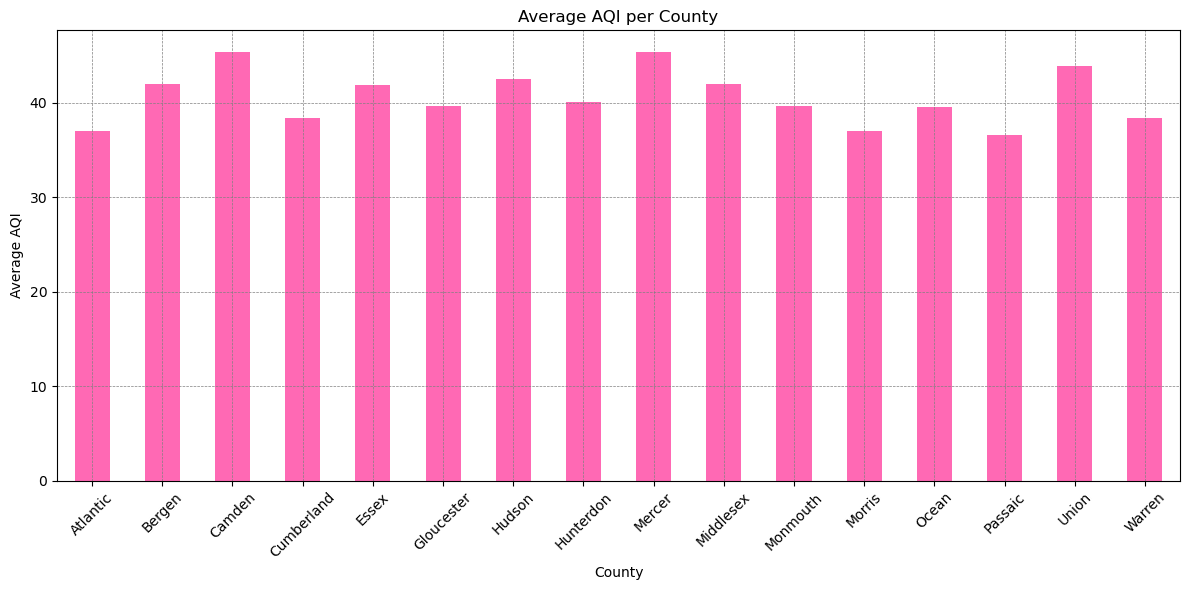

In [107]:
# Create the bar graph
plt.figure(figsize=(12, 6))
means.plot(kind='bar', color='hotpink')
plt.xlabel('County')
plt.ylabel('Average AQI')
plt.title('Average AQI per County')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()

# Display the bar graph
plt.show()

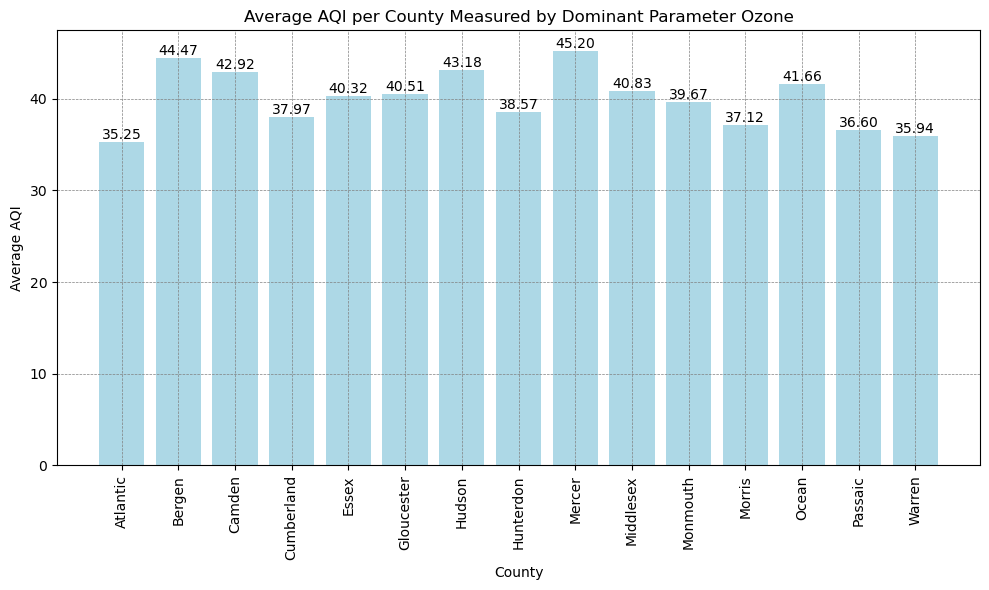

In [108]:
county2021_ozone = parameterCounty2021_mean[parameterCounty2021_mean.index.get_level_values(0) == 'Ozone']


fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(range(len(county2021_ozone)), county2021_ozone, color="lightblue", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter Ozone")
ax.set_xticks(range(len(county2021_ozone)))
ax.set_xticklabels(county2021_ozone.index.get_level_values(1), rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

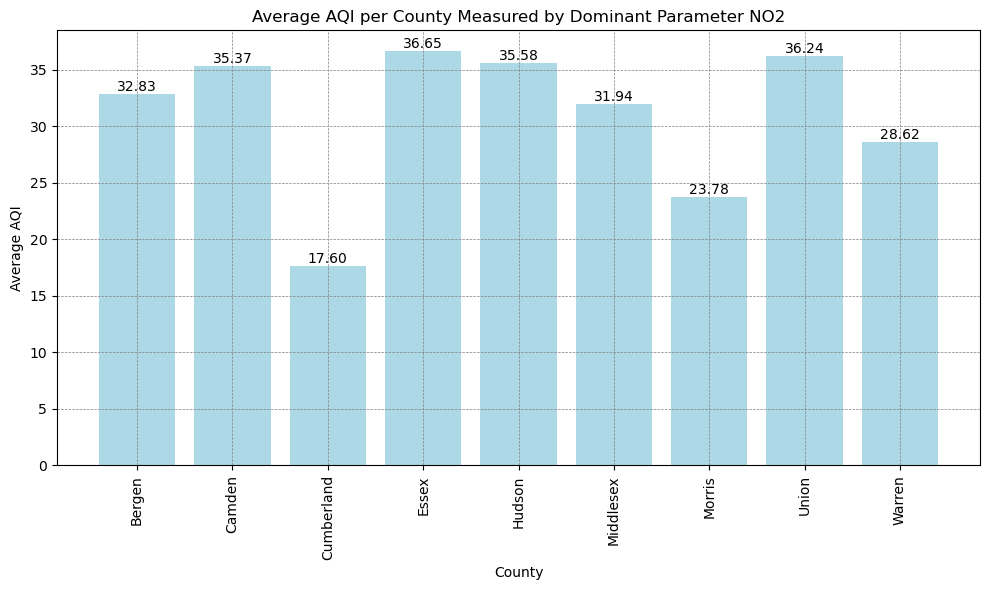

In [109]:
county2021_no2 = parameterCounty2021_mean[parameterCounty2021_mean.index.get_level_values(0) == 'NO2']

fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(range(len(county2021_no2)), county2021_no2, color="lightblue", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter NO2")
ax.set_xticks(range(len(county2021_no2)))
ax.set_xticklabels(county2021_no2.index.get_level_values(1), rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

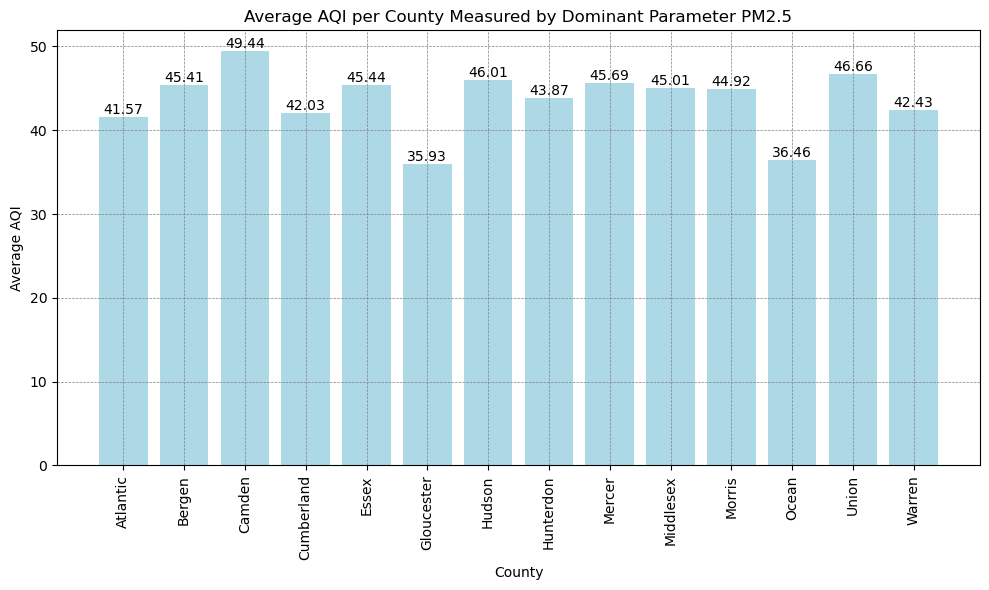

In [110]:
county2021_pm25 = parameterCounty2021_mean[parameterCounty2021_mean.index.get_level_values(0) == 'PM2.5']

fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(range(len(county2021_pm25)), county2021_pm25, color="lightblue", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter PM2.5")
ax.set_xticks(range(len(county2021_pm25)))
ax.set_xticklabels(county2021_pm25.index.get_level_values(1), rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

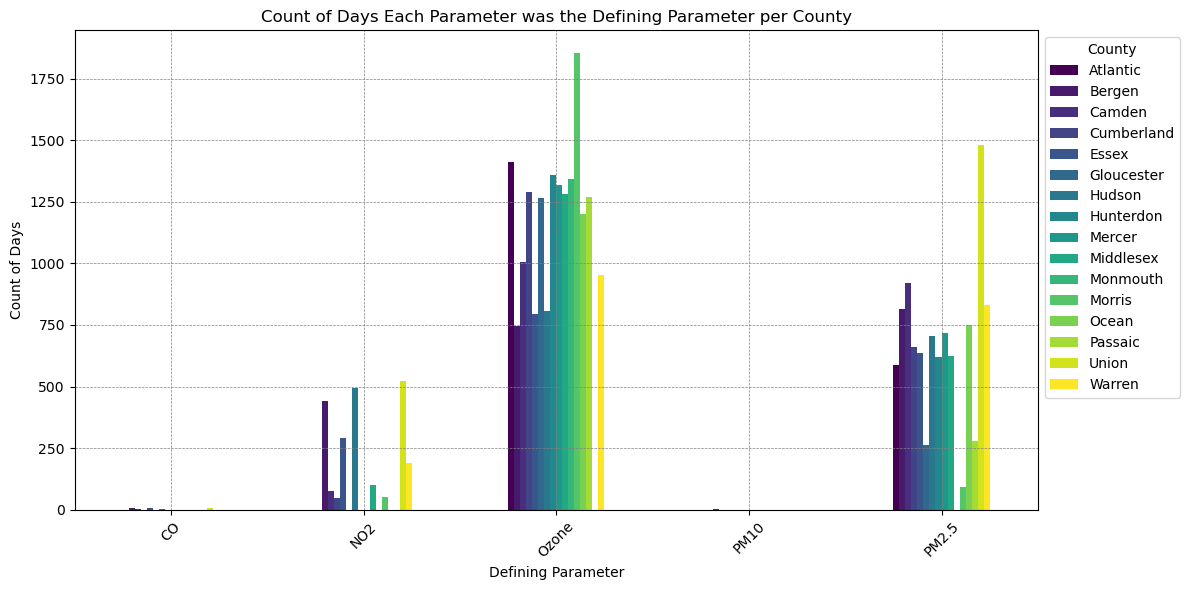

In [112]:
# Group by the defining parameter and county, then count the days each parameter was the defining parameter
count_days_per_parameter = state_data.groupby(['Defining Parameter', 'county Name']).size().unstack()

# Create the bar graph
count_days_per_parameter.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.xlabel('Defining Parameter')
plt.ylabel('Count of Days')
plt.title('Count of Days Each Parameter was the Defining Parameter per County')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='County', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
# Display the bar graph
plt.show()

In [47]:
import calplot
# Union & Hunterdon

Text(0.5, 1.0, 'Air Quality Index for Union County in 2018')

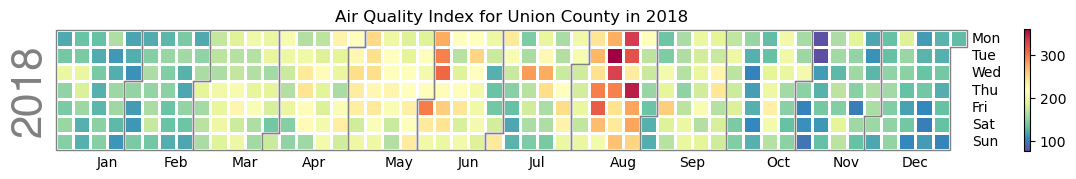

In [54]:
#Defining specific county & year
Union_2018 = AQI_18_df[AQI_18_df['county Name'] == 'Union']

#AQI_18_df.set_index('Date', inplace=True)
#AQI_18_df.index = pd.to_datetime(AQI_18_df.index)
#AQI_18_df['year'] = AQI_18_df.index.year

calplot.calplot(Union_2018['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Union County in 2018")

Text(0.5, 1.0, 'Air Quality Index for Hunterdon County in 2018')

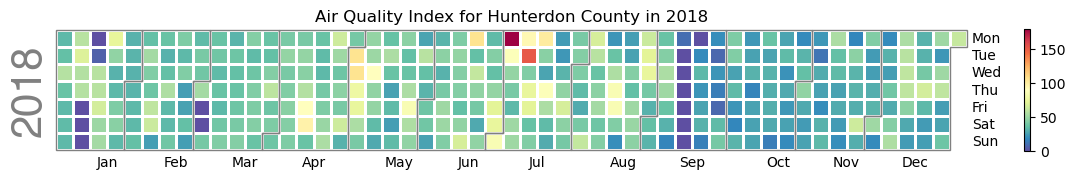

In [55]:
Hunterdon_2018 = AQI_18_df[AQI_18_df['county Name'] == 'Hunterdon']

calplot.calplot(Hunterdon_2018['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Hunterdon County in 2018")

Text(0.5, 1.0, 'Air Quality Index for Union County in 2019')

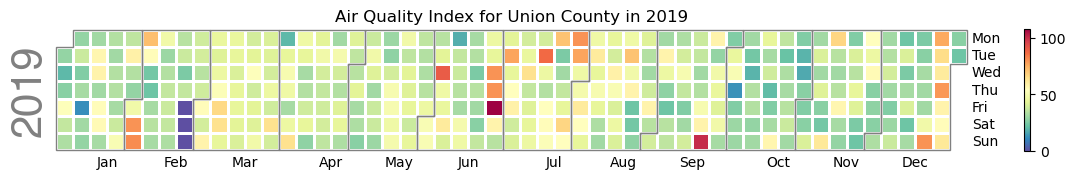

In [65]:
AQI_19_df = AQI_19_df.set_index('Date')
AQI_19_df.index = pd.to_datetime(AQI_19_df.index)

# Defining specific county & year
Union_2019 = AQI_19_df[AQI_19_df['county Name'] == 'Hunterdon']

# Plot the data using calplot
calplot.calplot(Union_2019['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Union County in 2019")


Text(0.5, 1.0, 'Air Quality Index for Hunterdon County in 2019')

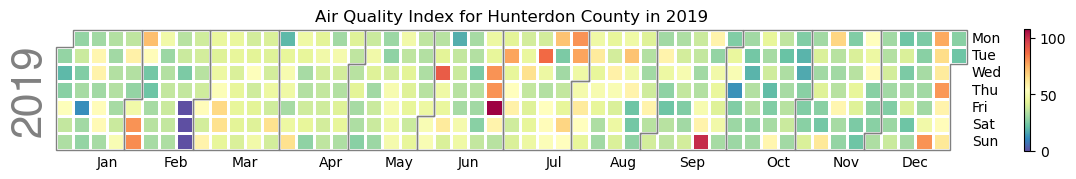

In [66]:
Hunterdon_2019 = AQI_19_df[AQI_19_df['county Name'] == 'Hunterdon']

calplot.calplot(Hunterdon_2019['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Hunterdon County in 2019")

Text(0.5, 1.0, 'Air Quality Index for Union County in 2020')

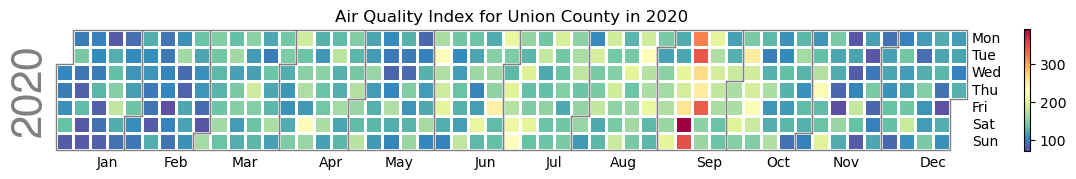

In [68]:
AQI_20_df = AQI_20_df.set_index('Date')
AQI_20_df.index = pd.to_datetime(AQI_20_df.index)

Union_2020 = AQI_20_df[AQI_20_df['county Name'] == 'Union']

calplot.calplot(Union_2020['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Union County in 2020")

Text(0.5, 1.0, 'Air Quality Index for Hunterdon County in 2020')

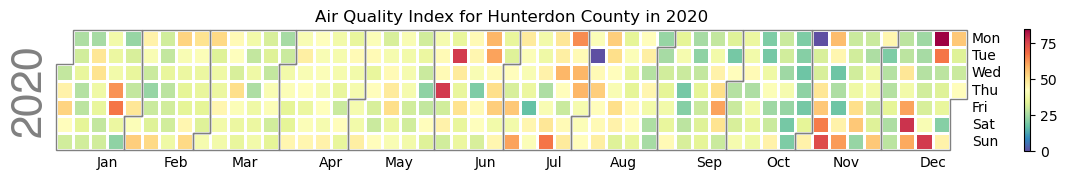

In [69]:
Hunterdon_2020 = AQI_20_df[AQI_20_df['county Name'] == 'Hunterdon']

calplot.calplot(Hunterdon_2020['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Hunterdon County in 2020")

Text(0.5, 1.0, 'Air Quality Index for Hunterdon County in 2021')

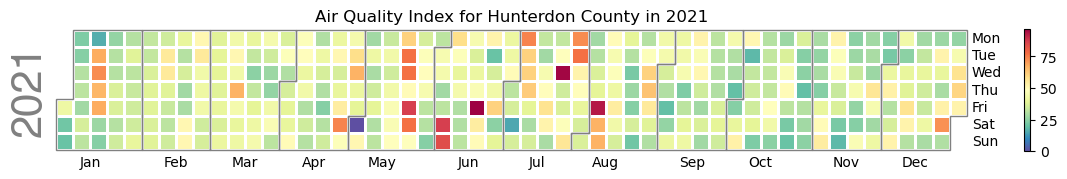

In [70]:
Hunterdon_2021 = state_data[state_data['county Name'] == 'Hunterdon']

calplot.calplot(Hunterdon_2021['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Hunterdon County in 2021")

Text(0.5, 1.0, 'Air Quality Index for Union County in 2022')

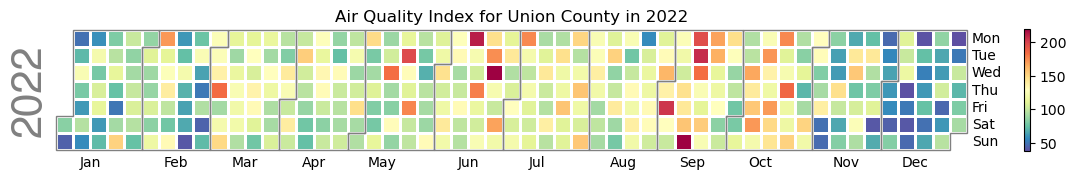

In [72]:
AQI_22_df = AQI_22_df.set_index('Date')
AQI_22_df.index = pd.to_datetime(AQI_22_df.index)

Union_2022 = AQI_22_df[AQI_22_df['county Name'] == 'Union']

calplot.calplot(Union_2022['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Union County in 2022")

Text(0.5, 1.0, 'Air Quality Index for Hunterdon County in 2022')

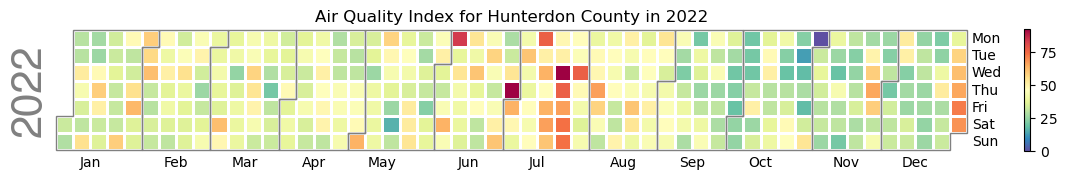

In [73]:
Hunterdon_2022 = AQI_22_df[AQI_22_df['county Name'] == 'Hunterdon']

calplot.calplot(Hunterdon_2022['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Hunterdon County in 2022")

Text(0.5, 1.0, 'Air Quality Index for Union County in 2023')

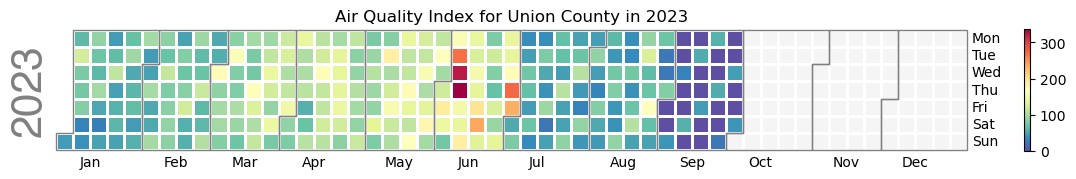

In [74]:
AQI_23_df = AQI_23_df.set_index('Date')
AQI_23_df.index = pd.to_datetime(AQI_23_df.index)

Union_2023 = AQI_23_df[AQI_23_df['county Name'] == 'Union']

calplot.calplot(Union_2023['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Union County in 2023")

Text(0.5, 1.0, 'Air Quality Index for Hunterdon County in 2023')

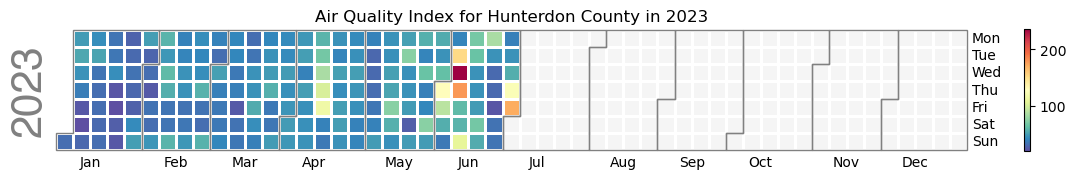

In [75]:
Hunterdon_2023 = AQI_23_df[AQI_23_df['county Name'] == 'Hunterdon']

calplot.calplot(Hunterdon_2023['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Hunterdon County in 2023")

Text(0.5, 1.0, 'Air Quality Index for Monmouth County in 2021')

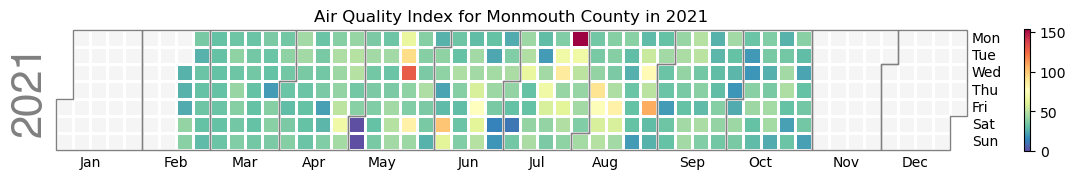

In [17]:
monmouth_county = state_data[state_data['county Name'] == 'Monmouth']

calplot.calplot(monmouth_county['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Monmouth County in 2021")

Text(0.5, 1.0, 'Air Quality Index for Bergen County in 2021')

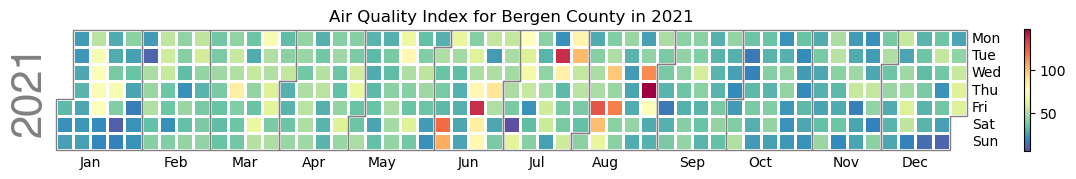

In [19]:
bergen_county = state_data[state_data['county Name'] == 'Bergen']

calplot.calplot(bergen_county['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Bergen County in 2021")

Text(0.5, 1.0, 'Air Quality Index for Union County in 2021')

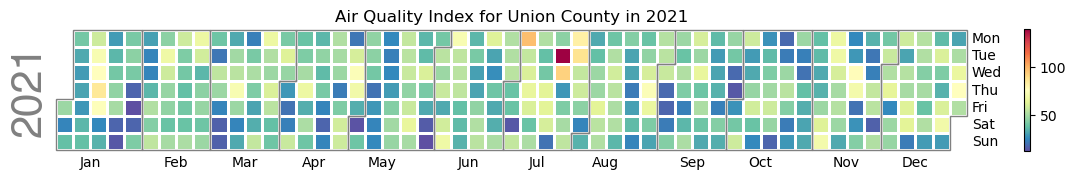

In [20]:
union_county = state_data[state_data['county Name'] == 'Union']

calplot.calplot(union_county['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Union County in 2021")

Text(0.5, 1.0, 'Air Quality Index for Warren County in 2021')

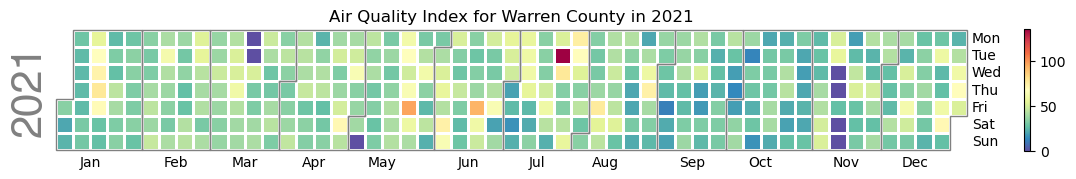

In [21]:
warren_county = state_data[state_data['county Name'] == 'Warren']

calplot.calplot(warren_county['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Warren County in 2021")

Text(0.5, 1.0, 'Air Quality Index for Mercer County in 2021')

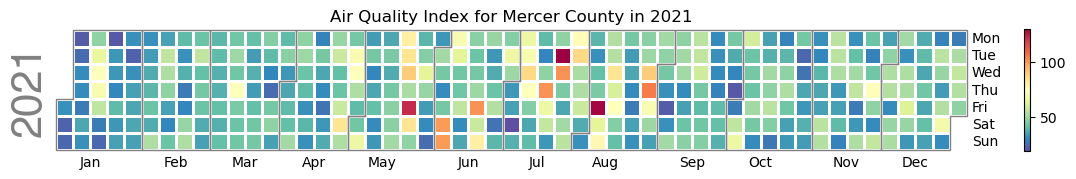

In [22]:
mercer_county = state_data[state_data['county Name'] == 'Mercer']

calplot.calplot(mercer_county['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Mercer County in 2021")

In [90]:
Union_2018 = nj_2018_df.loc[nj_2018_df['county Name'] == 'Union',:]
Union_2019 = nj_2019_df.loc[nj_2019_df['county Name'] == 'Union',:]
Union_2020 = nj_2020_df.loc[nj_2020_df['county Name'] == 'Union',:]
Union_2021 = nj_2021_df.loc[nj_2021_df['county Name'] == 'Union',:]
Union_2022 = nj_2022_df.loc[nj_2022_df['county Name'] == 'Union',:]
Union_2023 = nj_2023_df.loc[nj_2023_df['county Name'] == 'Union',:]

all_years_union = [Union_2018, Union_2019, Union_2020, union_county, Union_2022, Union_2023]
union_df = pd.concat(all_years_union)
union_df

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,year
Date,,,,,,,,,,
2018-01-01,New Jersey,Union,34,39,25,Good,PM2.5,34-039-0004,3,2018.0
2018-01-02,New Jersey,Union,34,39,49,Good,PM2.5,34-039-0004,3,2018.0
2018-01-03,New Jersey,Union,34,39,69,Moderate,PM2.5,34-039-0004,3,2018.0
2018-01-04,New Jersey,Union,34,39,47,Good,PM2.5,34-039-0004,3,2018.0
2018-01-05,New Jersey,Union,34,39,26,Good,PM2.5,34-039-0004,3,2018.0
...,...,...,...,...,...,...,...,...,...,...
2023-06-27,New Jersey,Union,34,39,47,Good,NO2,34-039-0004,3,NaN
2023-06-28,New Jersey,Union,34,39,54,Moderate,PM2.5,34-039-0004,3,NaN
2023-06-29,New Jersey,Union,34,39,117,Unhealthy for Sensitive Groups,PM2.5,34-039-2003,3,NaN


Text(0.5, 1.0, 'Air Quality Index for Union County 2018-2023')

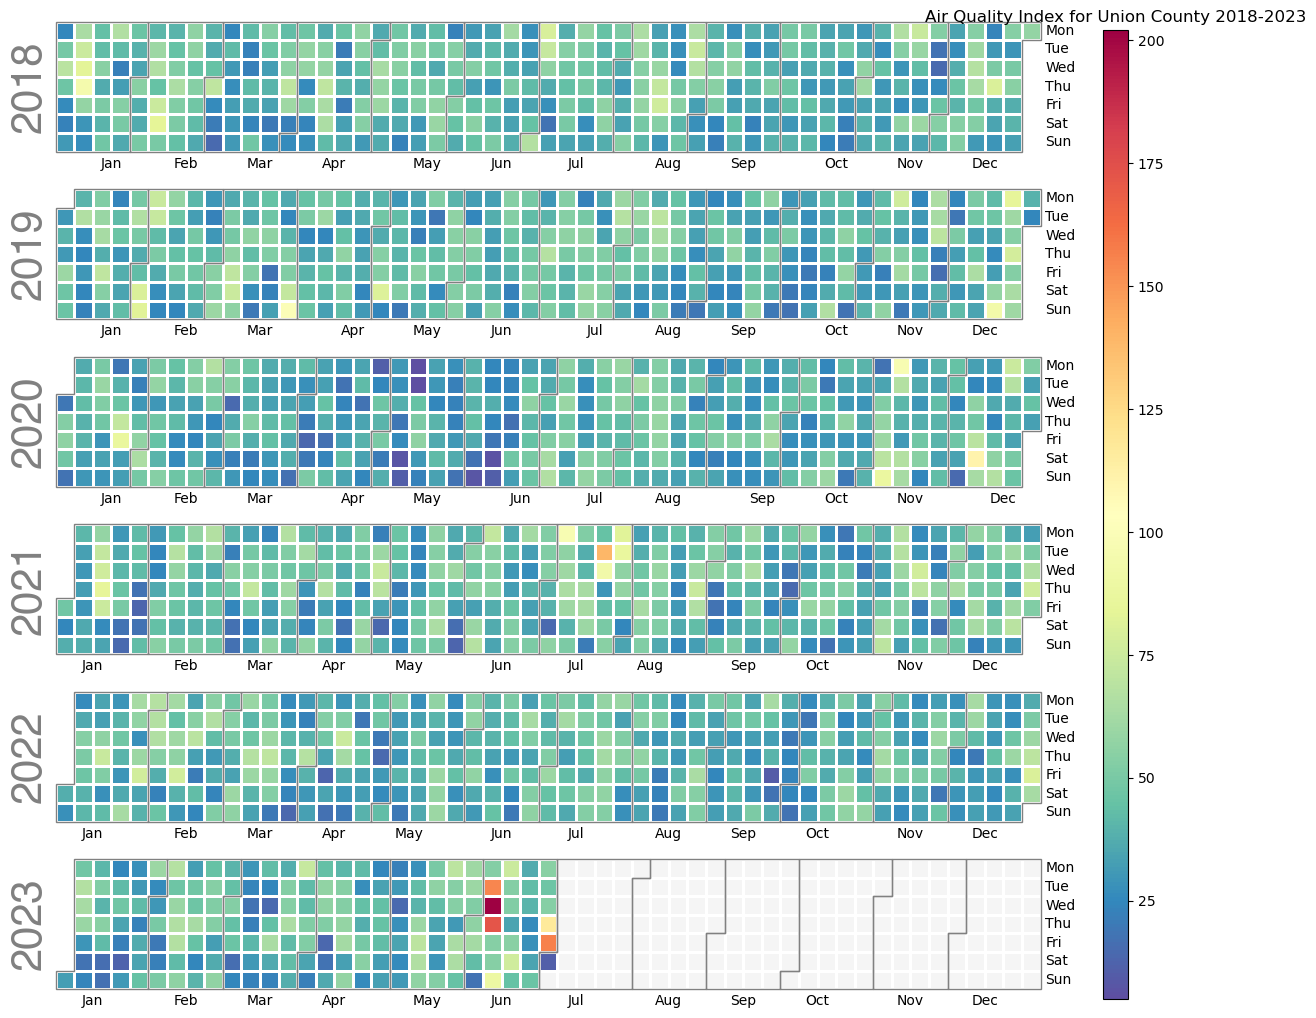

In [94]:
calplot.calplot(union_df['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Union County 2018-2023")

In [105]:
Hunterdon_2018 = nj_2018_df.loc[nj_2018_df['county Name'] == 'Hunterdon',:]
Hunterdon_2019 = nj_2019_df.loc[nj_2019_df['county Name'] == 'Hunterdon',:]
Hunterdon_2020 = nj_2020_df.loc[nj_2020_df['county Name'] == 'Hunterdon',:]
Hunterdon_2021 = nj_2021_df.loc[nj_2021_df['county Name'] == 'Hunterdon',:]
Hunterdon_2022 = nj_2022_df.loc[nj_2022_df['county Name'] == 'Hunterdon',:]
Hunterdon_2023 = nj_2023_df.loc[nj_2023_df['county Name'] == 'Hunterdon',:]

all_years_hunterdon = [Union_2018, Union_2019, Union_2020, union_county, Union_2022, Union_2023]
hunterdon_df = pd.concat(all_years_union)
hunterdon_df

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,year
Date,,,,,,,,,,
2018-01-01,New Jersey,Union,34,39,25,Good,PM2.5,34-039-0004,3,2018.0
2018-01-02,New Jersey,Union,34,39,49,Good,PM2.5,34-039-0004,3,2018.0
2018-01-03,New Jersey,Union,34,39,69,Moderate,PM2.5,34-039-0004,3,2018.0
2018-01-04,New Jersey,Union,34,39,47,Good,PM2.5,34-039-0004,3,2018.0
2018-01-05,New Jersey,Union,34,39,26,Good,PM2.5,34-039-0004,3,2018.0
...,...,...,...,...,...,...,...,...,...,...
2023-06-27,New Jersey,Union,34,39,47,Good,NO2,34-039-0004,3,NaN
2023-06-28,New Jersey,Union,34,39,54,Moderate,PM2.5,34-039-0004,3,NaN
2023-06-29,New Jersey,Union,34,39,117,Unhealthy for Sensitive Groups,PM2.5,34-039-2003,3,NaN


Text(0.5, 1.0, 'Air Quality Index for Hunterdon County 2018-2023')

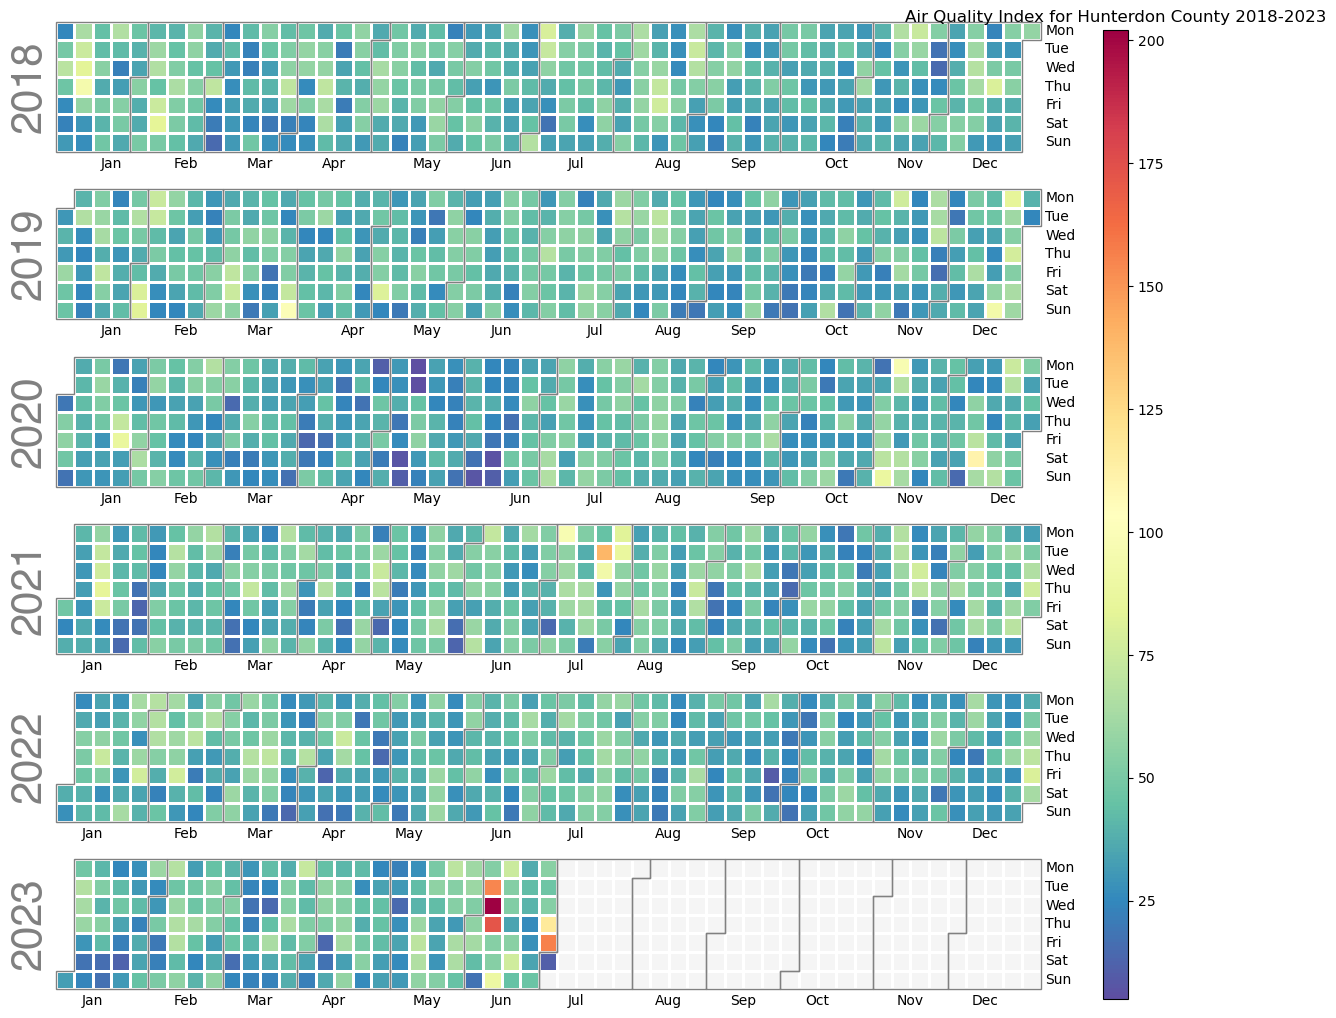

In [106]:
calplot.calplot(hunterdon_df['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Hunterdon County 2018-2023")